# The Wilson-Cowan model

The Wilson–Cowan model considers a homogeneous population of interconnected neurons of excitatory and inhibitory subtypes. All cells receive the same number of excitatory and inhibitory afferents, that is, all cells receive the same average excitation, $x(t)$. The target is to analyze the evolution in time of number of excitatory and inhibitory cells firing at time $t$,
$E(t)$ and $I(t)$ respectively.


## Background / Theory

### The Wilson-Cowan Model

The **Wilson-Cowan model** (1972) is a foundational neural mass model describing the interaction between excitatory (E) and inhibitory (I) neural populations. It was one of the first models to capture emergent oscillatory dynamics from E/I balance.

### The Equations

$$
\begin{aligned}
\tau_E \frac{dr_E}{dt} &= -r_E + (1 - r \cdot r_E) \cdot F_E(w_{EE} r_E - w_{EI} r_I + I_E) \\
\tau_I \frac{dr_I}{dt} &= -r_I + (1 - r \cdot r_I) \cdot F_I(w_{IE} r_E - w_{II} r_I + I_I)
\end{aligned}
$$

where:
- $r_E, r_I$: Excitatory and inhibitory population activities
- $\tau_E, \tau_I$: Time constants
- $w_{XY}$: Connection weights from population Y to X
- $r$: Refractory parameter (limits maximum firing)
- $I_E, I_I$: External inputs

### The Sigmoid Transfer Function

$$
F(x; a, \theta) = \frac{1}{1 + e^{-a(x - \theta)}} - \frac{1}{1 + e^{a\theta}}
$$

| Parameter | Role |
|-----------|------|
| $a$ | Gain (steepness of response) |
| $\theta$ | Threshold (input level for half-activation) |

### Connection Weights

| Weight | Meaning | Typical Effect |
|--------|---------|----------------|
| $w_{EE}$ | E→E recurrence | Positive feedback, bistability |
| $w_{EI}$ | I→E inhibition | Negative feedback, stabilization |
| $w_{IE}$ | E→I excitation | Drives inhibition |
| $w_{II}$ | I→I recurrence | Self-inhibition |

### Dynamical Regimes

The Wilson-Cowan model exhibits rich dynamics:

1. **Stable fixed points**: E/I balance at rest
2. **Limit cycle oscillations**: Rhythmic E/I alternation
3. **Bistability**: Multiple stable states
4. **Excitable dynamics**: Transient responses to perturbations

### Parameter "Knobs" - Biological Interpretation

Each parameter in the Wilson-Cowan model corresponds to a biological or functional "knob" that can be tuned to produce different neural dynamics. Understanding these mappings is crucial for relating model behavior to neuroscience.


| Parameter | Knob Name | Biological Correspondence | Effect Range |
|-----------|-----------|---------------------------|--------------|
| $\tau_E, \tau_I$ | Response Speed | Membrane time constant, ion channel kinetics | Fast (1ms) → Slow (10ms) |
| $a_E, a_I$ | Neural Gain | Synaptic efficacy, neurotransmitter sensitivity | 0.5 (sluggish) → 2.0 (sensitive) |
| $\theta_E, \theta_I$ | Activation Threshold | Firing threshold voltage | 1.0 (easy to activate) → 5.0 (hard to activate) |
| $w_{EE}$ | Recurrent Excitation | AMPA/NMDA strength within E population | 0-20 |
| $w_{EI}$ | Feedback Inhibition | GABAergic strength I→E | 0-20 |
| $w_{IE}$ | Feedforward Excitation | Glutamatergic drive to inhibition | 0-10 |
| $w_{II}$ | Recurrent Inhibition | GABAergic self-inhibition within I | 0-15 |
| $r$ | Refractory Period | Sodium channel inactivation | 0 (none) → 2 (strong) |


These combinations of parameters control higher-level system properties:

**1. E/I Balance Knob** ($w_{EE} / w_{EI}$ ratio):
- **High ratio (>1.0)**: Excitation-dominant system, risk of runaway activity (epileptiform)
- **Balanced (~0.9)**: Stable limit-cycle oscillations (gamma rhythms)
- **Low ratio (<0.8)**: Over-stabilized system, suppressed dynamics

**2. Timescale Separation Knob** ($\tau_I / \tau_E$):
- **$\tau_I \gg \tau_E$**: Slow inhibition relative to excitation → beta/gamma rhythms
- **$\tau_I \approx \tau_E$**: Symmetric dynamics → alpha rhythms
- **$\tau_I \ll \tau_E$**: Fast inhibition → high-frequency filtering

**3. Excitability Knob** ($a_E, \theta_E$):
- **High $a_E$, low $\theta_E$**: Hyperexcitable regime (epilepsy models)
- **Low $a_E$, high $\theta_E$**: Hypoexcitable regime (anesthesia models)
- **Intermediate**: Normal awake cortical states

These "knobs" provide an intuitive interface for parameter exploration while maintaining biological interpretability.



In [1]:
import sys

sys.path.append(r'D:\codes\projects\brainmass')
sys.path.append(r'D:\codes\projects\brainstate')

import brainmass
import brainstate
import braintools
import brainunit as u
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['image.cmap'] = 'plasma'

In [2]:
brainstate.environ.set(dt=0.1 * u.ms)

Environment:
- `dt = 0.1 ms` sets the integration time step for all updates.
- We will rely on `brainstate.transform.for_loop` to advance the model efficiently.

## Single node simulation

We instantiate one Wilson–Cowan node with OU noise on both E and I. The `step_run(i)` helper advances the model one time step with a proper `(i, t)` context. The node returns the current excitatory rate `rE`.

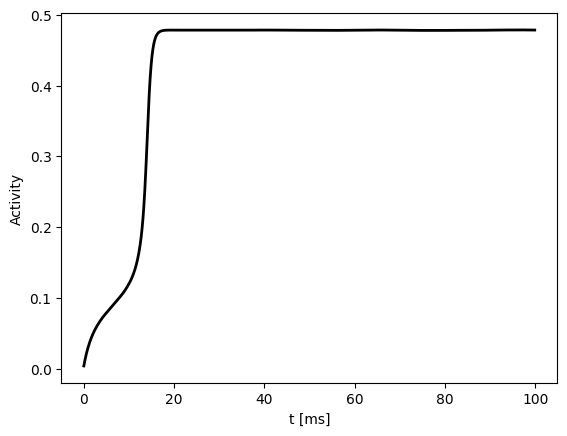

In [8]:
node = brainmass.WilsonCowanStep(
    1,
    noise_E=brainmass.OUProcess(1, sigma=0.01, init=braintools.init.ZeroInit()),
    noise_I=brainmass.OUProcess(1, sigma=0.01, init=braintools.init.ZeroInit()),
)
node.init_all_states()


def step_run(i):
    node.update(0.1)
    return node.rE.value, node.rI.value



indices = np.arange(1000)
exes, inhs = brainstate.transform.for_loop(step_run, indices)

plt.plot(indices * brainstate.environ.get_dt(), exes, lw=2, label='Excitation')
plt.plot(indices * brainstate.environ.get_dt(), inhs, lw=2, label='Inhibition')
plt.title("Wilson-Cowan Oscillator Dynamics")
plt.legend()
plt.xlabel("t [ms]")
plt.ylabel("Activity")
plt.show()

The trace shows `rE(t)` over time. With small noise and constant drive, the oscillator may settle to a fixed point or a limit cycle depending on parameters.

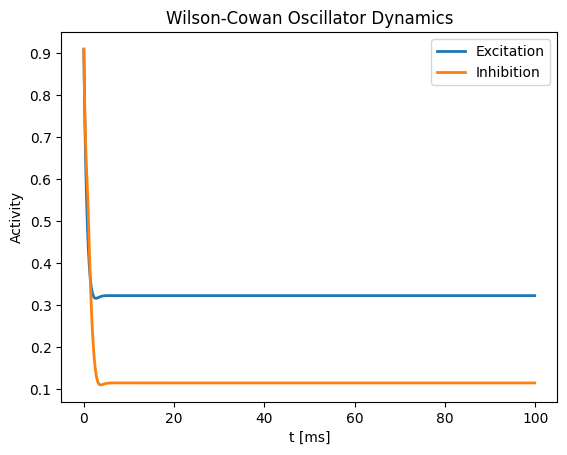

In [6]:
node = brainmass.WilsonCowanStep(
    1,
    wEE=10.,
    wEI=12.,
    wIE=8.,
    wII=3.0,
    a_E=0.2,
    a_I=4.0,
    rE_init=braintools.init.Constant(1.),
    rI_init=braintools.init.Constant(1.),
    # noise_E=brainmass.OUProcess(1, sigma=0.01, init=braintools.init.ZeroInit()),
    # noise_I=brainmass.OUProcess(1, sigma=0.01, init=braintools.init.ZeroInit()),
)
node.init_all_states()


def step_run(i):
    node.update()
    return node.rE.value, node.rI.value


indices = np.arange(1000)
exes, inhs = brainstate.transform.for_loop(step_run, indices)

plt.plot(indices * brainstate.environ.get_dt(), exes, lw=2, label='Excitation')
plt.plot(indices * brainstate.environ.get_dt(), inhs, lw=2, label='Inhibition')
plt.title("Wilson-Cowan Oscillator Dynamics")
plt.legend()
plt.xlabel("t [ms]")
plt.ylabel("Activity")
plt.show()

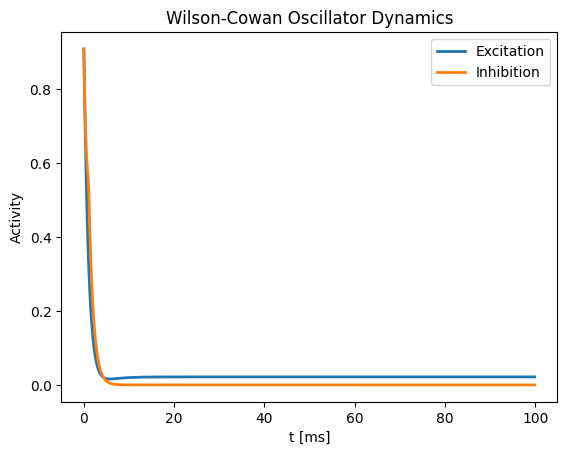

In [7]:
node = brainmass.WilsonCowanStep(
    1,
    wEE=20.,
    wEI=21.,
    wIE=16.,
    wII=6.,
    a_E=1.6,
    a_I=7.0,
    rE_init=braintools.init.Constant(1.),
    rI_init=braintools.init.Constant(1.),
    # noise_E=brainmass.OUProcess(1, sigma=0.01, init=braintools.init.ZeroInit()),
    # noise_I=brainmass.OUProcess(1, sigma=0.01, init=braintools.init.ZeroInit()),
)
node.init_all_states()


def step_run(i):
    node.update()
    return node.rE.value, node.rI.value


indices = np.arange(1000)
exes, inhs = brainstate.transform.for_loop(step_run, indices)

plt.plot(indices * brainstate.environ.get_dt(), exes, lw=2, label='Excitation')
plt.plot(indices * brainstate.environ.get_dt(), inhs, lw=2, label='Inhibition')
plt.title("Wilson-Cowan Oscillator Dynamics")
plt.legend()
plt.xlabel("t [ms]")
plt.ylabel("Activity")
plt.show()

## Bifurcation diagram

Let's draw a simple one-dimensional bifurcation diagram of this model to orient ourselves in the parameter space.


In [5]:
# these are the different input values that we want to scan
exc_inputs = np.arange(0, 5.5, 0.05)

We sweep a constant excitatory input across multiple independent nodes (one input per node). For each input value we simulate, then record the minimum and maximum of `rE` over time. Plotting min/max against input visualizes fixed points (lines collapsing) versus oscillatory regimes (min/max bands).

Notes:
- Increase simulation duration to better capture oscillation envelopes.
- You can reduce `exc_inputs` resolution for speed during exploration.

In [6]:
nodes = brainmass.WilsonCowanStep(exc_inputs.size)
nodes.init_all_states()


def step_run(i):
    return nodes.update(exc_inputs)


indices = np.arange(10000)
exec_activity = brainstate.transform.for_loop(step_run, indices)

In [7]:
max_exc = exec_activity.max(axis=0)
min_exc = exec_activity.min(axis=0)

The resulting diagram shows how steady‑state activity or oscillation amplitude varies with the external excitatory drive.

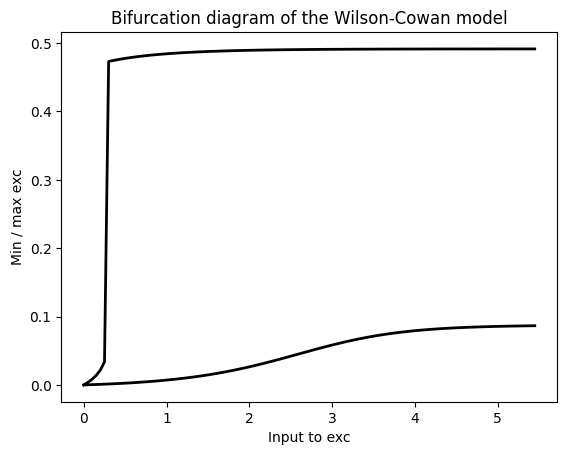

In [8]:
plt.plot(exc_inputs, max_exc, c='k', lw=2)
plt.plot(exc_inputs, min_exc, c='k', lw=2)
plt.title("Bifurcation diagram of the Wilson-Cowan model")
plt.xlabel("Input to exc")
plt.ylabel("Min / max exc")
plt.show()

## Input-Driven Transient Response

Neural systems must respond to external stimuli. The **transient response** characterizes how the system reacts to inputs of different profiles:

1. **Pulse Input**: Brief stimulation (e.g., sensory flash) → tests **excitability**
2. **Step Input**: Sustained drive onset (e.g., attention signal) → tests **adaptation**
3. **Ramp Input**: Gradually increasing signal (e.g., accumulating evidence) → tests **tracking**

These response patterns reveal:
- **Latency**: How quickly the system responds
- **Gain**: Amplitude of response relative to input
- **Damping**: Whether oscillations persist or decay
- **Steady-state error**: Difference between input and equilibrium response

In [9]:
# Define input functions
def pulse_input(t):
    """Brief 10ms pulse at t=100ms"""
    return u.math.where(
        u.math.logical_and(t > 100. * u.ms, t < 110. * u.ms),
        2.0,
        0.0
    )


def step_input(t):
    """Step increase at t=200ms"""
    return u.math.where(
        t > 200. * u.ms,
        1.0,
        0.0,
    )


def ramp_input(t):
    """Ramp from 0 to 2.0 over 500ms"""
    return u.math.where(
        t > 0. * u.ms,
        u.math.minimum(t / (500. * u.ms), 2.0),
        0.0
    )


# Input types to test
input_functions = [pulse_input, step_input, ramp_input]
input_names = ['Pulse (10ms)', 'Step (at 200ms)', 'Ramp (500ms)']
input_colors = ['purple', 'orange', 'green']

# Simulate each input type
responses_E = []
responses_I = []
input_traces = []

print("Simulating input-driven responses...")

for input_func, name in zip(input_functions, input_names):
    # Create fresh model
    model_transient = brainmass.WilsonCowanStep(1)
    model_transient.init_all_states()


    def step_transient(i):
        t = i * brainstate.environ.get_dt()
        inp = input_func(t)
        model_transient.update(rE_inp=inp)
        return model_transient.rE.value, model_transient.rI.value, inp


    indices_trans = np.arange(6000)  # 600 ms
    rE_resp, rI_resp, inp_trace = brainstate.transform.for_loop(step_transient, indices_trans)

    responses_E.append(rE_resp)
    responses_I.append(rI_resp)
    input_traces.append(inp_trace)

    print(f"  {name}: Complete")

print("Done!")

Simulating input-driven responses...
  Pulse (10ms): Complete
  Step (at 200ms): Complete
  Ramp (500ms): Complete
Done!


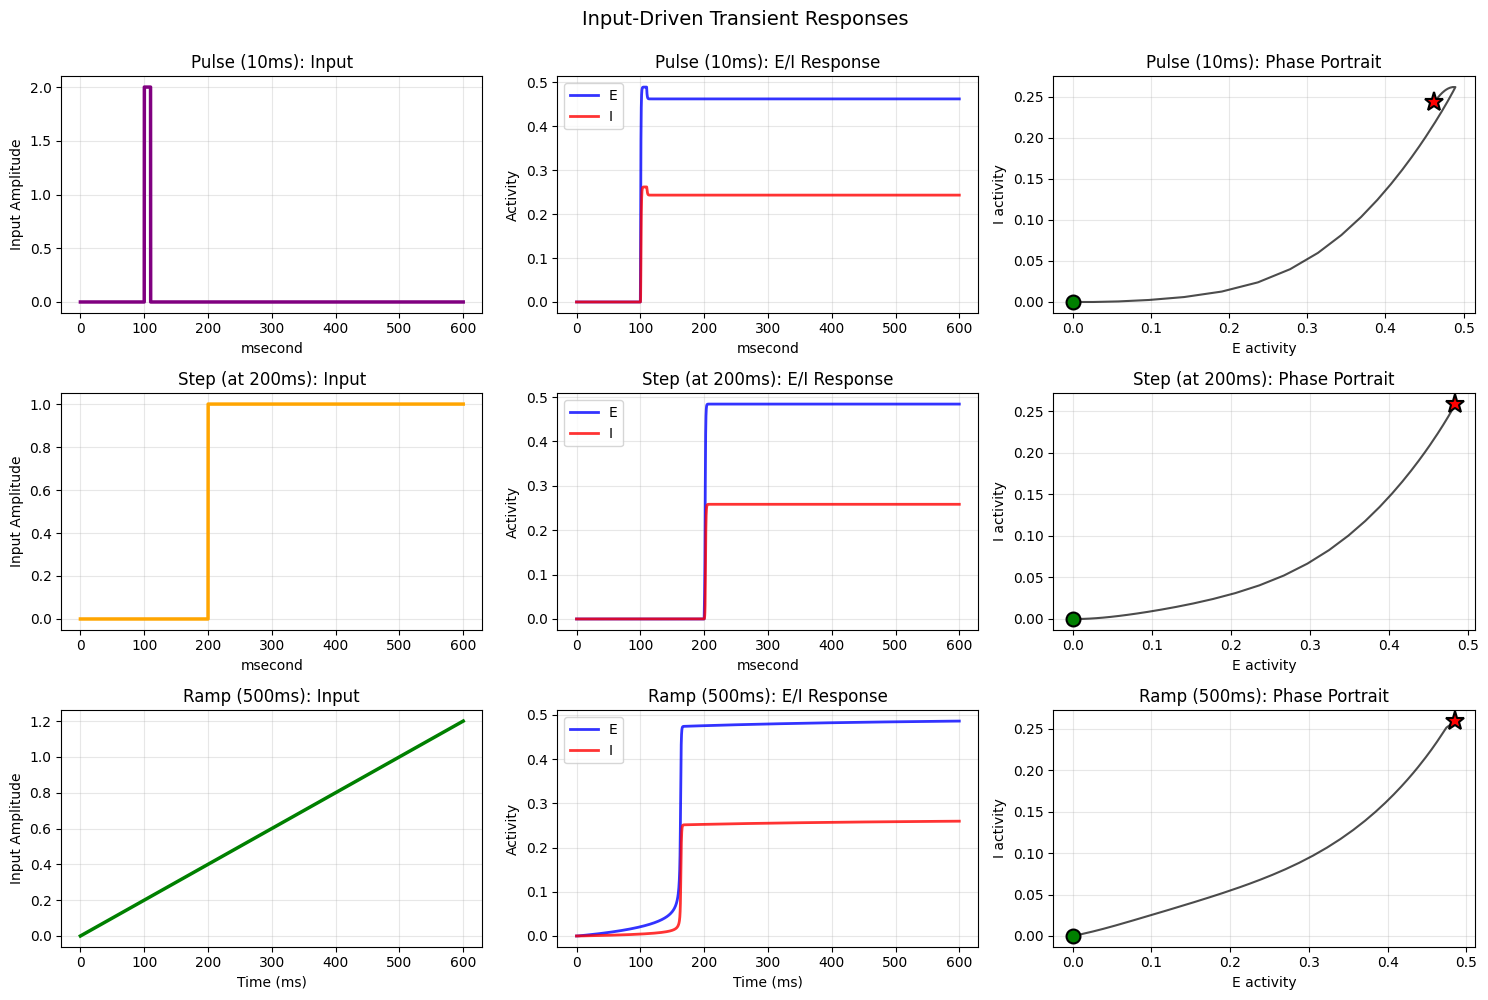


Response Metrics:
Pulse (10ms):
  Peak amplitude: 0.4894 at t=108.3 ms
  Response latency: 100.2 ms
  Steady state: 0.4625
  Overshoot: 5.8%

Step (at 200ms):
  Peak amplitude: 0.4843 at t=209.7 ms
  Response latency: 200.7 ms
  Steady state: 0.4843
  Overshoot: 0.0%

Ramp (500ms):
  Peak amplitude: 0.4859 at t=599.9 ms
  Response latency: 145.9 ms
  Steady state: 0.4858
  Overshoot: 0.0%



In [10]:
# Visualization: 3x3 grid (input type × measurement)
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

t_trans = indices_trans * brainstate.environ.get_dt()

for row, (rE_resp, rI_resp, inp_trace, name, color) in enumerate(
    zip(responses_E, responses_I, input_traces, input_names, input_colors)
):

    # Column 1: Input trace
    ax = axes[row, 0]
    ax.plot(t_trans, inp_trace, color=color, linewidth=2.5)
    ax.set_ylabel('Input Amplitude')
    ax.set_title(f'{name}: Input')
    ax.grid(True, alpha=0.3)
    if row == 2:
        ax.set_xlabel('Time (ms)')

    # Column 2: E/I Response
    ax = axes[row, 1]
    ax.plot(t_trans, rE_resp[:, 0], 'b-', linewidth=2, label='E', alpha=0.8)
    ax.plot(t_trans, rI_resp[:, 0], 'r-', linewidth=2, label='I', alpha=0.8)
    ax.set_ylabel('Activity')
    ax.set_title(f'{name}: E/I Response')
    ax.legend()
    ax.grid(True, alpha=0.3)
    if row == 2:
        ax.set_xlabel('Time (ms)')

    # Column 3: Phase Portrait
    ax = axes[row, 2]
    ax.plot(rE_resp[:, 0], rI_resp[:, 0], 'k-', linewidth=1.5, alpha=0.7)
    ax.plot(rE_resp[0, 0], rI_resp[0, 0], 'go', markersize=10, markeredgecolor='black', markeredgewidth=1.5)
    ax.plot(rE_resp[-1, 0], rI_resp[-1, 0], 'r*', markersize=14, markeredgecolor='black', markeredgewidth=1.5)
    ax.set_xlabel('E activity')
    ax.set_ylabel('I activity')
    ax.set_title(f'{name}: Phase Portrait')
    ax.grid(True, alpha=0.3)

plt.suptitle('Input-Driven Transient Responses', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

# Quantitative metrics
print("\nResponse Metrics:")
print("=" * 60)

for i, (rE_resp, name) in enumerate(zip(responses_E, input_names)):
    # Find peak
    peak_idx = np.argmax(rE_resp[:, 0])
    peak_time = float(t_trans[peak_idx] / u.ms)
    peak_amplitude = rE_resp[peak_idx, 0]

    # Steady state (last 100 samples)
    steady_state = np.mean(rE_resp[-100:, 0])

    # Initial response time (when crosses 10% of peak)
    threshold = 0.1 * peak_amplitude
    response_idx = np.where(rE_resp[:, 0] > threshold)[0]
    response_time = float(t_trans[response_idx[0]] / u.ms) if len(response_idx) > 0 else 0

    print(f"{name}:")
    print(f"  Peak amplitude: {peak_amplitude:.4f} at t={peak_time:.1f} ms")
    print(f"  Response latency: {response_time:.1f} ms")
    print(f"  Steady state: {steady_state:.4f}")
    print(f"  Overshoot: {(peak_amplitude - steady_state) / steady_state * 100:.1f}%")
    print()


## Bistability Demonstration

One of the most fascinating phenomena in neural dynamics is **bistability**: the coexistence of two stable states. Depending on the initial condition, the system can settle into different attractors, even with the same parameters and inputs.

This property is crucial for modeling:
- **Cortical up/down states** (transitions between high and low firing)
- **Working memory** (persistent activity states)
- **Decision-making** (commitment to one of two choices)

We'll demonstrate bistability by:
1. Finding parameter regime where two stable fixed points coexist
2. Showing trajectories from different initial conditions converge to different attractors
3. Computing the **basin of attraction** for each stable state

In [11]:
@brainstate.transform.jit(static_argnums=2, static_argnames='n_steps')
def bistable_simulation(rE0, rI0, n_steps: int = 20000):
    # Create model in bistable parameter regime
    # Key: High recurrent excitation (wEE) creates positive feedback
    model_bistable = brainmass.WilsonCowanStep(
        1,
        wEE=16.0,  # Increased from default 12
        wEI=12.0,  # Decreased from default 13
        wII=8.0,  # Decreased from default 11
    )

    # Reset and set initial condition
    model_bistable.init_all_states()
    model_bistable.rE.value = u.math.array([rE0])
    model_bistable.rI.value = u.math.array([rI0])

    # Simulate
    def step_bistable(i):
        model_bistable.update(rE_inp=0.5)  # Constant input
        return model_bistable.rE.value, model_bistable.rI.value

    indices_bistable = np.arange(n_steps)  # 2000 ms
    rE_traj, rI_traj = brainstate.transform.for_loop(step_bistable, indices_bistable)
    return rE_traj, rI_traj

In [12]:
# Different initial conditions
initial_conditions = [
    (0.05, 0.05),  # Low state
    (0.65, 0.35),  # High state
    (0.35, 0.20),  # Intermediate (will go to one or the other)
]

colors_ic = ['blue', 'red', 'purple']
labels_ic = ['Low IC', 'High IC', 'Mid IC']

# Storage for trajectories
trajectories_rE = []
trajectories_rI = []

print("Simulating bistability from different initial conditions...")

for (rE0, rI0), color, label in zip(initial_conditions, colors_ic, labels_ic):
    rE_traj, rI_traj = bistable_simulation(rE0, rI0, n_steps=20000)

    trajectories_rE.append(rE_traj)
    trajectories_rI.append(rI_traj)

    print(
        f"  {label}: "
        f"Started at ({rE0:.2f}, {rI0:.2f}), "
        f"ended at ({float(rE_traj[-1, 0]):.4f}, {float(rI_traj[-1, 0]):.4f})"
    )

print("Done!")

Simulating bistability from different initial conditions...
  Low IC: Started at (0.05, 0.05), ended at (0.4902, 0.2812)
  High IC: Started at (0.65, 0.35), ended at (0.4902, 0.2812)
  Mid IC: Started at (0.35, 0.20), ended at (0.4902, 0.2812)
Done!


In [13]:
# Sigmoid function
def F(x, a, theta):
    return 1 / (1 + np.exp(-a * (x - theta))) - 1 / (1 + np.exp(a * theta))


In [14]:
indices_bistable = np.arange(20000)  # 2000 ms

Computing basin of attraction (this may take ~30-60 seconds)...
Basin computation complete!


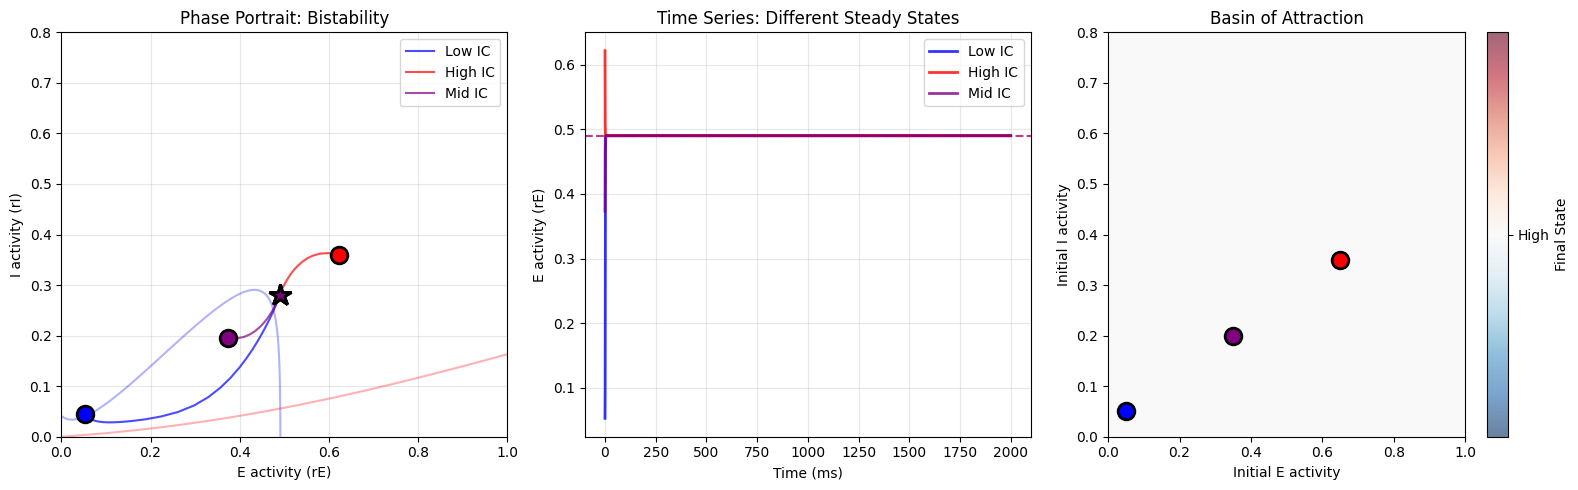


Biological Significance:
- Blue region → Low state (cortical 'down' state)
- Red region → High state (cortical 'up' state)
- Boundary separates the two basins of attraction


In [15]:
# Visualization: 3-panel bistability figure
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Panel 1: Phase portrait with trajectories
ax = axes[0]

# Plot nullclines for reference
rE_range_bis = np.linspace(0, 1, 200)
rI_range_bis = np.linspace(0, 0.8, 200)
RE_bis, RI_bis = np.meshgrid(rE_range_bis, rI_range_bis)

wEE_bis, wEI_bis = 16.0, 12.0
wIE_bis, wII_bis = 4.0, 8.0
I_E_bis = 0.5

drE_bis = -RE_bis + (1 - 1.0 * RE_bis) * F(wEE_bis * RE_bis - wEI_bis * RI_bis + I_E_bis, 1.2, 2.8)
drI_bis = -RI_bis + (1 - 1.0 * RI_bis) * F(wIE_bis * RE_bis - wII_bis * RI_bis, 1.0, 4.0)

ax.contour(RE_bis, RI_bis, drE_bis, levels=[0], colors=['blue'], linewidths=1.5, alpha=0.3)
ax.contour(RE_bis, RI_bis, drI_bis, levels=[0], colors=['red'], linewidths=1.5, alpha=0.3)

# Plot trajectories
for (rE_traj, rI_traj, color, label) in zip(trajectories_rE, trajectories_rI, colors_ic, labels_ic):
    ax.plot(rE_traj[:, 0], rI_traj[:, 0], '-', color=color, linewidth=1.5, alpha=0.7, label=label)
    ax.plot(rE_traj[0, 0], rI_traj[0, 0], 'o', color=color, markersize=12, markeredgecolor='black', markeredgewidth=2)
    ax.plot(rE_traj[-1, 0], rI_traj[-1, 0], '*', color=color, markersize=16, markeredgecolor='black', markeredgewidth=2)

ax.set_xlabel('E activity (rE)')
ax.set_ylabel('I activity (rI)')
ax.set_title('Phase Portrait: Bistability')
ax.legend()
ax.grid(True, alpha=0.3)

# Panel 2: Time series overlay
ax = axes[1]
t_bis = indices_bistable * brainstate.environ.get_dt()

for (rE_traj, color, label) in zip(trajectories_rE, colors_ic, labels_ic):
    ax.plot(t_bis, rE_traj[:, 0], '-', color=color, linewidth=2, label=label, alpha=0.8)

ax.set_xlabel('Time (ms)')
ax.set_ylabel('E activity (rE)')
ax.set_title('Time Series: Different Steady States')
ax.legend()
ax.grid(True, alpha=0.3)
ax.axhline(y=trajectories_rE[0][-1, 0], color=colors_ic[0], linestyle='--', alpha=0.5)
ax.axhline(y=trajectories_rE[1][-1, 0], color=colors_ic[1], linestyle='--', alpha=0.5)

# Panel 3: Basin of attraction
ax = axes[2]

# Grid of initial conditions
rE_init_grid = np.linspace(0, 1, 40)
rI_init_grid = np.linspace(0, 0.8, 40)
basin_map = np.zeros((len(rI_init_grid), len(rE_init_grid)))

print("Computing basin of attraction (this may take ~30-60 seconds)...")

for i, rE_init in enumerate(rE_init_grid):
    for j, rI_init in enumerate(rI_init_grid):
        rE_final = bistable_simulation(rE_init, rI_init, n_steps=15000)[0]

        # Classify final state (low vs high)
        final_value = rE_final[-1, 0]
        if final_value < 0.3:
            basin_map[j, i] = 0  # Low state
        else:
            basin_map[j, i] = 1  # High state

print("Basin computation complete!")

# Plot basin
im = ax.imshow(basin_map, extent=[0, 1, 0, 0.8], origin='lower', cmap='RdBu_r', alpha=0.6, aspect='auto')
ax.set_xlabel('Initial E activity')
ax.set_ylabel('Initial I activity')
ax.set_title('Basin of Attraction')

# Mark the initial conditions we tested
for (rE0, rI0), color in zip(initial_conditions, colors_ic):
    ax.plot(rE0, rI0, 'o', color=color, markersize=12, markeredgecolor='black', markeredgewidth=2)

# Colorbar
cbar = plt.colorbar(im, ax=ax, ticks=[0, 1])
cbar.set_label('Final State')
cbar.ax.set_yticklabels(['Low', 'High'])

plt.tight_layout()
plt.show()

print("\nBiological Significance:")
print("- Blue region → Low state (cortical 'down' state)")
print("- Red region → High state (cortical 'up' state)")
print("- Boundary separates the two basins of attraction")

## Brain network

In [16]:
import os.path
import kagglehub

path = kagglehub.dataset_download("oujago/hcp-gw-data-samples")
data = braintools.file.msgpack_load(os.path.join(path, "hcp-data-sample.msgpack"))

Loading checkpoint from D:\Data\kagglehub\datasets\oujago\hcp-gw-data-samples\versions\1\hcp-data-sample.msgpack


We now couple many Wilson–Cowan nodes according to structural connectivity (weights `Cmat`) and distances `Dmat` from the `hcp` dataset. Delays are derived from distances and a `signal_speed`. We use diffusive coupling on `rE` with per‑edge delays and scale the interaction by a global gain `k`.

In [17]:
class Network(brainstate.nn.Module):
    def __init__(self, signal_speed=2., k=1.):
        super().__init__()

        conn_weight = data['Cmat'].copy()
        np.fill_diagonal(conn_weight, 0)
        delay_time = data['Dmat'].copy() / signal_speed
        np.fill_diagonal(delay_time, 0)
        indices_ = np.arange(conn_weight.shape[1])
        indices_ = np.tile(np.expand_dims(indices_, axis=0), (conn_weight.shape[0], 1))

        self.node = brainmass.WilsonCowanStep(
            80,
            noise_E=brainmass.OUProcess(80, sigma=0.01, init=braintools.init.ZeroInit()),
            noise_I=brainmass.OUProcess(80, sigma=0.01, init=braintools.init.ZeroInit()),
        )
        self.coupling = brainmass.DiffusiveCoupling(
            self.node.prefetch_delay('rE', (delay_time * u.ms, indices_), init=braintools.init.Uniform(0, 0.05)),
            self.node.prefetch('rE'),
            conn_weight,
            k=k
        )

    def update(self):
        current = self.coupling()
        rE = self.node(current)
        return rE

    def step_run(self, i):
        return self.update()

Network dynamics:
- `prefetch_delay('rE', (delay_time, indices))` constructs a delayed view of E‑rates along edges.
- `DiffusiveCoupling` computes inputs from delayed neighbors and scales by `k`.
- The node integrates these inputs and returns `rE`.

In [18]:
net = Network()
net.init_all_states()
indices = np.arange(0, 6e3 // (brainstate.environ.get_dt() / u.ms))
exes = brainstate.transform.for_loop(net.step_run, indices)

We compute functional connectivity (pairwise correlation) from the simulated `rE` matrix and plot it alongside sample time series. Stronger structure‑function correspondence typically emerges around specific `k` and delay regimes.

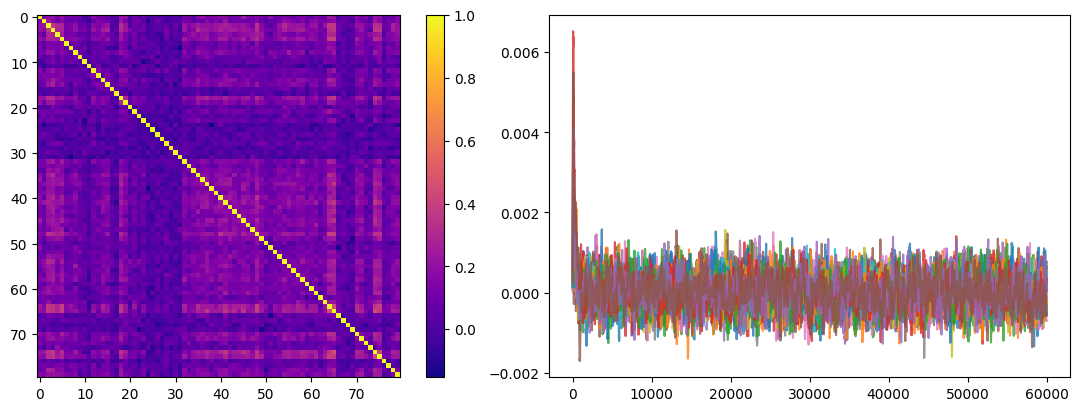

In [19]:
fig, gs = braintools.visualize.get_figure(1, 2, 4, 6)
ax1 = fig.add_subplot(gs[0, 0])
fc = braintools.metric.functional_connectivity(exes)
ax = ax1.imshow(fc)
plt.colorbar(ax, ax=ax1)
ax2 = fig.add_subplot(gs[0, 1])
ax2.plot(indices, exes[:, ::5], alpha=0.8)
plt.show()